A demonstration to calculate the Potential Energy Anomaly for Profile data.


### Relevant imports and filepath configuration

In [71]:
import coast
import numpy as np
from os import path
import matplotlib.pyplot as plt
import matplotlib.colors as colors  # colormap fiddling

In [72]:
# set some paths
root = "./"
dn_files = root + "./example_files/"
fn_prof = path.join(dn_files, "coast_example_en4_201008.nc")
fn_cfg_prof = path.join("config","example_en4_profiles.json")

### Loading data

In [73]:
# Create a Profile object and load in the data:
profile = coast.Profile(config=fn_cfg_prof)
profile.read_en4( fn_prof )

config/example_en4_profiles.json


If you are using EN4 data, you can use the process_en4() routine to apply quality control flags to the data (replacing with NaNs):

In [74]:
processed_profile = profile.process_en4()
profile = processed_profile

### Inspect profile locations
Have a look inside the `profile.py` class to see what it can do. But first have a look at the spatial distribution of profiles.

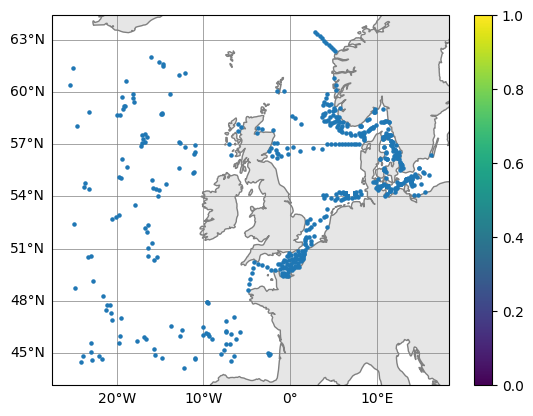

(<Figure size 640x480 with 2 Axes>, <GeoAxesSubplot: >)

In [75]:
profile.plot_map()

### Calculates Potential Energy Anomaly

Similar to the Gridded object, potential energy anomaly can be calculated for Profile objects. This method exists within a `ProfileStratifiction` object, which must be initialised



In [76]:
pa = coast.ProfileStratification(profile)

Potential energy anomaly is calculated to a prescribed depth, Zmax:

In [77]:
Zmax = 200  # metres
pa.calc_pea(profile, Zmax)

shape sal:(400, 1100)
shape rho:(400, 1100)
shape sal:(400, 1100)
shape rho:(400, 1100)


/Users/jeff/opt/anaconda3/envs/coast/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/jeff/opt/anaconda3/envs/coast/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In this calculation a number of steps happen within ProfileStratification: for a supplied Profile, first the vertical spacing is calculated

``profile.calculate_vertical_spacing()``

Then a depth mask is calculated to exclude depth below the Zmax threshold.
(The last depth level is a float between 0,1 denoting how much of the next spacing below is deeper than Zmax - To facilitate the integral to Zmax)

``Zd_mask, kmax = profile.calculate_vertical_mask(Zmax)``

Then densities (depth varying and depth averaged) are computed from the temperature and salinity fields
``profile.construct_density()``

Finally the depth integrals are calculated.


## Make a plot


THERE IS OBVIOUSLY AN ISSUE HERE WITH NEGATIVE PEA VALUES AND SMALL POSITIVE VALUES...

/Users/jeff/opt/anaconda3/envs/coast/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/jeff/opt/anaconda3/envs/coast/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


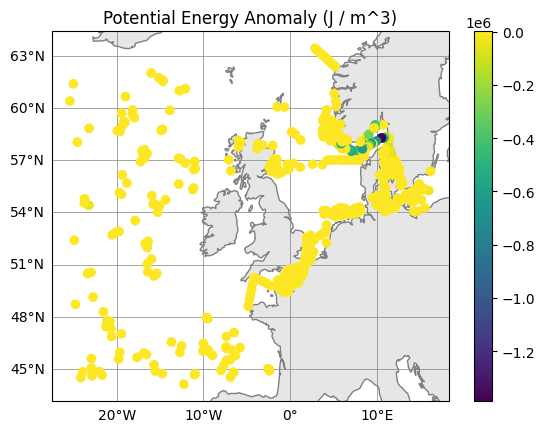

In [43]:
fig, ax = pa.quick_plot("pea")
fig.tight_layout()

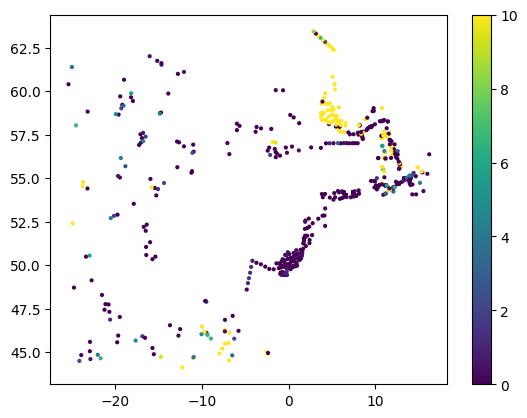

In [64]:
plt.scatter( pa.dataset.longitude,
            pa.dataset.latitude,
            s=4, c=pa.dataset.pea)
plt.clim([0,10])
plt.colorbar()